In [1]:
import psycopg2
import pandas as pd
# Connection parameters, yours will be different
param_dic = {
    "host"      : "XXX",
    "database"  : "XXX",
    "user"      : "XXX",
    "password"  : "XXX",
    "port"      : "5432"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

In [2]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [3]:
# Connect to the database
conn = connect(param_dic)
column_names = ['video_id', 'video_title', 'upload_date', 'view_count','like_count', 'comment_count', 'categories', 'year']
# Execute the "SELECT *" query
df = postgresql_to_dataframe(conn, "select * from videos", column_names)
df.head()

Connecting to the PostgreSQL database...
Connection successful


,video_id,video_title,upload_date,view_count,like_count,comment_count,categories,year
0,AjRXlSwk-E0,iddaa.com | Salernitana - Torino (0-1) - Maç Ö...,2022-04-02,2034,71,7,Serie A,2022
1,F9xbW-yWtu8,iddaa.com | Brighton - Norwich (0-0) - Maç Öze...,2022-04-02,3021,97,8,Premier League,2022
2,leUGYEfLUBY,iddaa.com | Wolves - Aston Villa (2-1) - Maç Ö...,2022-04-02,24705,489,31,Premier League,2022
3,R2f6vHRvOJ0,Andrea Belotti İle Torino 1-0 Öne Geçti! #SerieA,2022-04-02,2497,60,5,Serie A,2022
4,SKZ8pxV-KGw,iddaa.com | Manchester United - Leicester City...,2022-04-02,186284,3546,279,Premier League,2022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       545 non-null    object
 1   video_title    545 non-null    object
 2   upload_date    545 non-null    object
 3   view_count     545 non-null    int64 
 4   like_count     545 non-null    int64 
 5   comment_count  545 non-null    int64 
 6   categories     545 non-null    object
 7   year           545 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 34.2+ KB


In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='like_count', ylabel='view_count'>

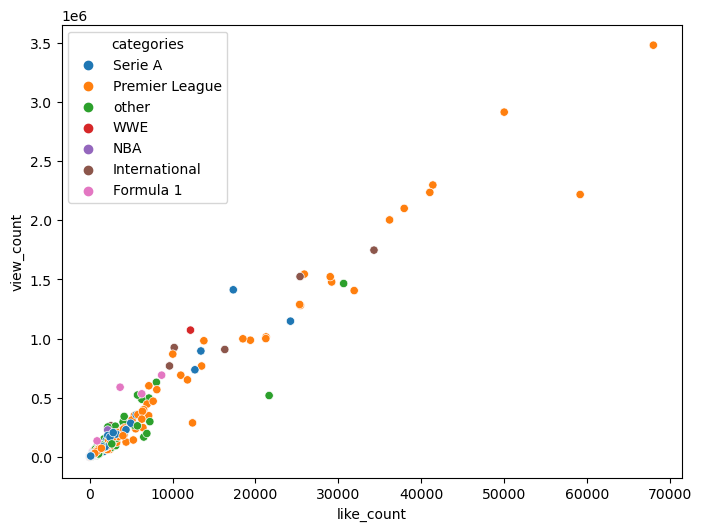

In [56]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(x='like_count',y='view_count',data=df,hue='categories')

<AxesSubplot:xlabel='comment_count', ylabel='view_count'>

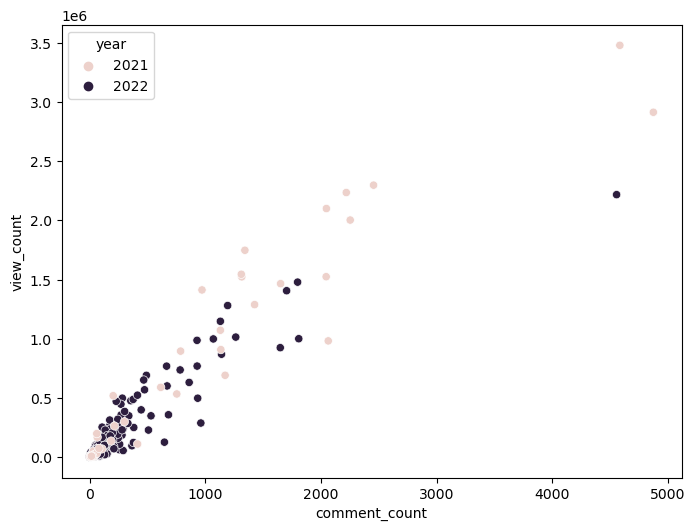

In [57]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(x='comment_count',y='view_count',data=df,hue='year')

In [58]:
df['categories'].value_counts()

Premier League    188
Serie A           134
other             122
NBA                59
Formula 1          19
WWE                14
International       9
Name: categories, dtype: int64

In [7]:
df2 = pd.get_dummies(df['categories'])
df2.head()

,Formula 1,International,NBA,Premier League,Serie A,WWE,other
0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0


In [8]:
df3 = pd.concat([df,df2],axis=1)

In [9]:
df4 = pd.get_dummies(df['year'])
df4.head()

,2021,2022
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [10]:
df5 = pd.concat([df3,df4],axis=1)

In [11]:
df5.head()

,video_id,video_title,upload_date,view_count,like_count,comment_count,categories,year,Formula 1,International,NBA,Premier League,Serie A,WWE,other,2021,2022
0,AjRXlSwk-E0,iddaa.com | Salernitana - Torino (0-1) - Maç Ö...,2022-04-02,2034,71,7,Serie A,2022,0,0,0,0,1,0,0,0,1
1,F9xbW-yWtu8,iddaa.com | Brighton - Norwich (0-0) - Maç Öze...,2022-04-02,3021,97,8,Premier League,2022,0,0,0,1,0,0,0,0,1
2,leUGYEfLUBY,iddaa.com | Wolves - Aston Villa (2-1) - Maç Ö...,2022-04-02,24705,489,31,Premier League,2022,0,0,0,1,0,0,0,0,1
3,R2f6vHRvOJ0,Andrea Belotti İle Torino 1-0 Öne Geçti! #SerieA,2022-04-02,2497,60,5,Serie A,2022,0,0,0,0,1,0,0,0,1
4,SKZ8pxV-KGw,iddaa.com | Manchester United - Leicester City...,2022-04-02,186284,3546,279,Premier League,2022,0,0,0,1,0,0,0,0,1


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## CREATE X and y
X = df5.drop(['video_id','video_title','upload_date','categories','view_count','year'],axis=1)
y = df5['view_count']

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Liner Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

test_predictions = lr_model.predict(X_test)

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

print(MAE)
print(RMSE)

28306.941650973888
55753.52937493124


In [62]:
lr_model.coef_

array([293621.47538111,  71788.06037732,   4857.65827019,  15867.55883348,
        -1729.13985838,    417.9146955 ,   -599.41422017,  -3502.35556365,
        -4206.57949395,  11801.47318308, -11801.47318308])

In [63]:
coeff_df = pd.DataFrame(lr_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
like_count,293621.475381
comment_count,71788.060377
Formula 1,4857.658270
International,15867.558833
NBA,-1729.139858
Premier League,417.914696
Serie A,-599.414220
WWE,-3502.355564
other,-4206.579494
2021,11801.473183


In [65]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

base_elastic_model = ElasticNet()

param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.553e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.987e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [66]:
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1)

In [67]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [68]:
y_pred = grid_model.predict(X_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(MAE)
print(RMSE)

28295.223630872
55726.7895500379


## Polynomial Regression

In [69]:
from sklearn.preprocessing import PolynomialFeatures

# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,5):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str'

In [70]:
train_rmse_errors

[76643.62899389966, 43814.681372599414, 35748.103130198135, 137512.10528076786]

In [71]:
test_rmse_errors

[55753.52937493111, 41762.517672103044, 3257744.7529894174, 94456353.29798678]

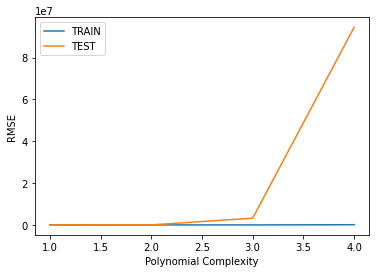

In [77]:
plt.plot(range(1,5),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,5),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [78]:
base_elastic_model = ElasticNet()

param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1],
             }

grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.312e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.310e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.309e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.308e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.308e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.823e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.307e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.823e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.307e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.166e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.823e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.106e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.922e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.325e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.101e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.921e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.320e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.169e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.310e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.308e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.308e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.347e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.178e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.119e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.926e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.342e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.177e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.827e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.114e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.925e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.337e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.175e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=5, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.826e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.110e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=5, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.924e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.325e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.102e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.169e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=5, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=5, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.311e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=5, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.99; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=5, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.99; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END .............................alpha=5, l1_ratio=0.99; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.352e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.180e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.927e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.348e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.179e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.926e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.344e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.177e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.827e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.925e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.332e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.174e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.325e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.102e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.921e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.314e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.309e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.359e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.185e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.132e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.931e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.356e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.183e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.830e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.929e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.354e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.182e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.929e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.9; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.179e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END .............................alpha=50, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.9; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.927e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.343e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ............................alpha=50, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=50, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.827e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=50, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=50, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.926e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.328e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=50, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=50, l1_ratio=0.99; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ............................alpha=50, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=50, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=50, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=50, l1_ratio=0.99; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.923e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.363e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.188e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.835e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.933e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.359e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.832e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.133e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.357e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.184e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.830e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.930e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.353e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ............................alpha=100, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.9; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.829e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.9; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.928e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.350e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ............................alpha=100, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.829e+11, tolerance: 3.802e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.337e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.176e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.925e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.317e+11, tolerance: 4.363e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+11, tolerance: 5.185e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.099e+11, tolerance: 4.585e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.921e+11, tolerance: 4.894e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s


C:\Users\kadir\anaconda3\envs\youtubeproject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.298e+11, tolerance: 5.708e+09
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [73]:
y_pred = grid_model.predict(X_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(MAE)
print(RMSE)

4582110.609934028
58431797.64629274
